<a href="https://colab.research.google.com/github/vglykos/NLP/blob/main/Markov_model_classifier_poetry_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split

In [2]:
#import datasets
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/edgar_allan_poe.txt
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt


--2022-12-16 06:55:16--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/edgar_allan_poe.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26622 (26K) [text/plain]
Saving to: ‘edgar_allan_poe.txt’

edgar_allan_poe.txt 100%[===================>]  26.00K  --.-KB/s    in 0.001s  

2022-12-16 06:55:16 (20.1 MB/s) - ‘edgar_allan_poe.txt’ saved [26622/26622]

--2022-12-16 06:55:17--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

In [3]:
#print txt file contents

# #Method 1
# f = open('edgar_allan_poe.txt', 'r')
# file_contents = f.read()
# # print (file_contents)
# print(type(file_contents))
# print(len(file_contents))

#Method 2
!head edgar_allan_poe.txt

LO! Death hath rear'd himself a throne
In a strange city, all alone,
Far down within the dim west
Where the good, and the bad, and the worst, and the best,
Have gone to their eternal rest.
 
There shrines, and palaces, and towers
Are not like any thing of ours
Oh no! O no! ours never loom
To heaven with that ungodly gloom!


In [4]:
!head robert_frost.txt

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth; 

Then took the other, as just as fair,
And having perhaps the better claim
Because it was grassy and wanted wear,
Though as for that the passing there


In [5]:
#the docs contain capitalization, panctuation, empty lines

In [6]:
# Next! 
#collect data from both poems
#Treat them line by line and put them all together.
#for every line remove punctuation, lowercase, and remove \n
#In the end we have a list of strings and a list of poem labels
 
input_files = ["edgar_allan_poe.txt" , "robert_frost.txt"]

input_texts = []
labels = []

for label, f in enumerate(input_files):
    print("text |{}| corresponds to label {}" .format(f , label))

    for line in open(f):
        line = line.rstrip().lower() #lowecase the characters & remove the \n
        if line:
            #remove punctuation
            line = line.translate(str.maketrans("" , "" , string.punctuation ))
            # print(line)
            input_texts.append(line)
            labels.append(label)


text |edgar_allan_poe.txt| corresponds to label 0
text |robert_frost.txt| corresponds to label 1


In [7]:
#We must split the dataset before tokenizing. 
#If in the testset some words are not train, then so be it. 
#These words should be "unknown"
train_text , test_text , Ytrain , Ytest = train_test_split(input_texts , labels)
print(len(Ytrain))
print(len(Ytest))

1615
539


In [8]:
train_text[:10]

['the very hours are breathing low',
 'i had a glimpse through curtain laces',
 'son mother can make a common table rear',
 'where no wind dared to stir unless on tiptoe',
 'the faintest restless rustling ran all through them',
 'i wonder what those signals are',
 'come straight down off this mountain just as fast',
 'with our arms at the level of our knees',
 'goodlooking books like that he picked one fresh',
 'and would suffice']

In [9]:
Ytrain[:10]

[0, 1, 1, 0, 1, 1, 1, 1, 1, 1]

In [10]:
#word2idx

idx = 1
word2idx = {"<unk>" : 0} #the unknown words in the testset will have index 0

for text in train_text:
    tokens = text.split() #or word_tokenize
    for token in tokens:
        if token not in word2idx:
            word2idx[token] = idx
            idx += 1 

In [11]:
print(type(word2idx))
print(len(word2idx))

<class 'dict'>
2508


In [12]:
#Before we tokenized the train corpus and assigned for each token of the vocabulary a unique index
#Now we will use this indexing map to transform the lines of text into lines of integers (indeces)
train_text_int = []
test_text_int = []

for text in train_text:
    tokens = text.split()
    line_as_int = [word2idx.get(token) for token in tokens]
    train_text_int.append(line_as_int)

for text in test_text:
    tokens = text.split()
    line_as_int = [word2idx.get(token , 0) for token in tokens]
    test_text_int.append(line_as_int)

In [13]:
print(train_text_int[0])
print(train_text[0])
print(word2idx)

[1, 2, 3, 4, 5, 6]
the very hours are breathing low
{'<unk>': 0, 'the': 1, 'very': 2, 'hours': 3, 'are': 4, 'breathing': 5, 'low': 6, 'i': 7, 'had': 8, 'a': 9, 'glimpse': 10, 'through': 11, 'curtain': 12, 'laces': 13, 'son': 14, 'mother': 15, 'can': 16, 'make': 17, 'common': 18, 'table': 19, 'rear': 20, 'where': 21, 'no': 22, 'wind': 23, 'dared': 24, 'to': 25, 'stir': 26, 'unless': 27, 'on': 28, 'tiptoe': 29, 'faintest': 30, 'restless': 31, 'rustling': 32, 'ran': 33, 'all': 34, 'them': 35, 'wonder': 36, 'what': 37, 'those': 38, 'signals': 39, 'come': 40, 'straight': 41, 'down': 42, 'off': 43, 'this': 44, 'mountain': 45, 'just': 46, 'as': 47, 'fast': 48, 'with': 49, 'our': 50, 'arms': 51, 'at': 52, 'level': 53, 'of': 54, 'knees': 55, 'goodlooking': 56, 'books': 57, 'like': 58, 'that': 59, 'he': 60, 'picked': 61, 'one': 62, 'fresh': 63, 'and': 64, 'would': 65, 'suffice': 66, 'wanted': 67, 'put': 68, 'out': 69, 'light': 70, 'see': 71, 'my': 72, 'grave': 73, 'is': 74, 'growing': 75, 'or': 

In [16]:
#initialize A and pi matrices
V = len(word2idx)

#we have 2 classes. so 2 As and pis
#ones for add-1 smoothing
A0 = np.ones((V,V))
pi0 = np.ones(V)

A1 = np.ones((V,V))
pi1 = np.ones(V)

In [17]:
#compute counts for A and pi
def compute_counts(text_as_int , A, pi):
    for tokens in text_as_int: #text_as_int is a list of lists / tokens is a list of intergers (indeces)
        last_idx = None
        #now we enter the list which contains the indeces of single text lines
        for idx in tokens:
            #if token is the first word in the line
            if last_idx == None: 
                pi[idx] += 1
            else:
                #the last word exists
                A[last_idx , idx] += 1

            #update last idx
            last_idx = idx
            


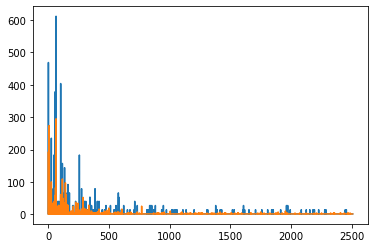

In [38]:
compute_counts( [t for t, y in zip(train_text_int , Ytrain) if y == 0] , A0, pi0)
compute_counts( [t for t, y in zip(train_text_int , Ytrain) if y == 1] , A1, pi1)

#lets inspect
plt.plot(pi0);
plt.plot(pi1);

In [45]:
#As and pis contain counts but we want probabilities
A0 = A0 / A0.sum(axis=1, keepdims=True)
pi0 = pi0 / pi0.sum(axis=0)
A1 = A1 / A1.sum(axis=1, keepdims=True)
pi1 = pi1 / pi1.sum(axis=0)

In [48]:
#log A and pi
logA0 = np.log(A0)
logpi0 = np.log(pi0)

logA1 = np.log(A1)
logpi1 = np.log(pi1)

In [65]:
#compute priors
count0 = sum(y==0 for y in Ytrain)
count1 = sum(y==1 for y in Ytrain)
total = len(Ytrain)

p0 = count0 / total
p1 = count1 / total

logp0 = np.log(p0)
logp1 = np.log(p1)

count0, count1, total, p0, p1

(530, 1085, 1615, 0.3281733746130031, 0.6718266253869969)